In [1]:
%run init.ipynb
%run init-tensor_product.ipynb

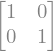

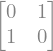

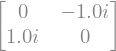

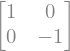

In [2]:
for j in range(4):
    display(pauli(j))

# Espelhos

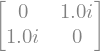

In [3]:
M = pauli(2)*pauli(3)
M

In [4]:
mbk(M)

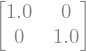

In [5]:
M*tsco(M)

In [6]:
for j in range(2):
    display(mbk(M*pket(str(j))))

# QWP

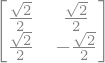

In [7]:
H = (1/sqrt(2))*(pauli(1) + pauli(3))
H

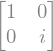

In [47]:
S = pauli(3).applyfunc(lambda x: sqrt(x))
S

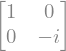

In [7]:
Sdg = tsco(S)
Sdg

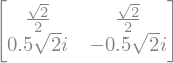

In [9]:
QWP = S*H
QWP

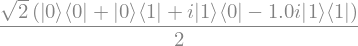

In [10]:
mbk(QWP).simplify()

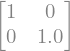

In [11]:
QWP*tsco(QWP)

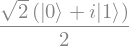

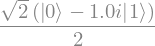

In [12]:
for j in range(2):
    display(mbk(QWP*pket(str(j))).simplify())

# BS

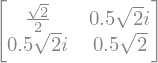

In [13]:
BS = S*H*S
BS

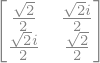

In [14]:
simplify(BS, rational=True)

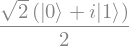

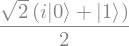

In [15]:
for j in range(2):
    display(mbk(BS*pket(str(j))).simplify(rational=True))

# HWP = CNOT = $C_X^{AB}$

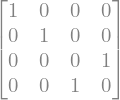

In [45]:
HWP_AB = CNOT = tp(proj(pket('0')), pauli(0)) + tp(proj(pket('1')), pauli(1))
CNOT

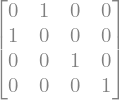

In [46]:
CNOT_AB_0 = tp(proj(pket('1')), pauli(0)) + tp(proj(pket('0')), pauli(1))
CNOT_AB_0

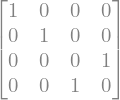

In [17]:
HWP_AB

In [18]:
# HWP
for j in range(2):
    for k in range(2):
        print("|{}{}>".format(j,k))
        display(mbk(HWP_AB*pket(str(j)+str(k))).simplify())

|00>


|01>


|10>


|11>


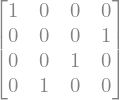

In [19]:
HWP_BA = CNOT_BA = tp(pauli(0),proj(pket('0'))) + tp(pauli(1), proj(pket('1')))
HWP_BA

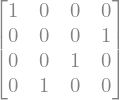

In [20]:
HWP_BA = troca_qubit_rho(HWP_AB, 0, 1)
HWP_BA

In [21]:
# CNOT_BA
for j in range(2):
    for k in range(2):
        print("HWP_BA|{}{}> = {}".format(j,k, mbk(HWP_BA*pket(str(j)+str(k))).simplify()))
        #display(mbk(HWP_BA*pket(str(j)+str(k))).simplify())

HWP_BA|00> = |00>
HWP_BA|01> = |11>
HWP_BA|10> = |10>
HWP_BA|11> = |01>


# PBS

## C_Z = $C_Z^{AB}$

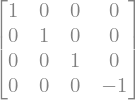

In [22]:
C_Z = tp(proj(pket('0')), pauli(0)) + tp(proj(pket('1')), pauli(3))
C_Z

## C_Y = $C_Y^{AB}$

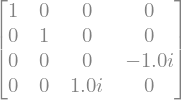

In [23]:
C_Y = tp(proj(pket('0')), pauli(0)) + tp(proj(pket('1')), pauli(2))
C_Y

## PBS

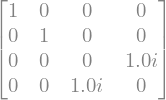

In [24]:
PBS_AB = C_Y*C_Z
PBS_AB

In [25]:
for j in range(2):
    for k in range(2):
        print("|{}{}>".format(j,k))
        display(mbk(PBS_AB*pket(str(j)+str(k))).simplify())

|00>


|01>


|10>


|11>


# BBO_AB

## Par de fótons parcialmente emaranhados

Quero construir no IBMQ um estado emaranhado na forma
\begin{equation}
\left\vert \Psi_{+}^{part.}\right\rangle =c_{+}\left\vert 01\right\rangle
+c_{-}\left\vert 10\right\rangle .
\end{equation}


Temos que a matriz $U_3\left(  \theta,\phi,\lambda\right)  $ é dada por
\begin{equation}
U_3\left(  \theta,\phi,\lambda\right)  =\left[
\begin{array}
[c]{cc}
\cos\frac{\theta}{2} & -e^{i\lambda}\sin\frac{\theta}{2}\\
e^{i\phi}\sin\frac{\theta}{2} & e^{i\left(  \phi+\lambda\right)  }\cos
\frac{\theta}{2}
\end{array}
\right]  .
\end{equation}
Com $\phi=\lambda=0$, segue que
\begin{equation}
R_{y}\left(  \theta\right)  =U\left(  \theta,0,0\right)  =\left[
\begin{array}
[c]{cc}
\cos\frac{\theta}{2} & -\sin\frac{\theta}{2}\\
\sin\frac{\theta}{2} & \cos\frac{\theta}{2}
\end{array}
\right]  =\left[
\begin{array}
[c]{cc}
c_{+} & -c_{-}\\
c_{-} & c_{+}
\end{array}
\right]  .
\end{equation}

### Estado inicial do IBMq

Vamos verificar que o par parcialmente emaranhado pode ser obtido por meio de
\begin{equation}
\left\vert \Psi\right\rangle _{AB}=X_{B}C_{X}^{AB}R_{y}^{A}\left(
\theta\right)  \left\vert 00\right\rangle _{AB}.
\end{equation}


Considerando $\left\vert \Psi_{0}\right\rangle _{AB}=\left\vert
00\right\rangle _{AB},$ temos
\begin{equation}
\left\vert \Psi_{1}\right\rangle =R_{y}\left(  \theta\right)  \left\vert
00\right\rangle _{AB}=c_{+}\left\vert 00\right\rangle +c_{-}\left\vert
10\right\rangle .
\end{equation}


Agora fazendo $C_{X}^{AB}\left\vert \Psi_{1}\right\rangle $, temos
\begin{equation}
\left\vert \Psi_{2}\right\rangle =c_{+}\left\vert 00\right\rangle
+c_{-}\left\vert 11\right\rangle .
\end{equation}


Atuando $X_{B}\left\vert \Psi_{2}\right\rangle $, segue que
\begin{equation}
\left\vert \Psi_{3}\right\rangle =\left\vert \Psi_{+}^{c}\right\rangle
=c_{+}\left\vert 01\right\rangle +c_{-}\left\vert 10\right\rangle =\cos
\frac{\theta}{2}\left\vert 01\right\rangle +\sin\frac{\theta}{2}\left\vert
10\right\rangle .
\end{equation}

## $U3(\theta, \phi, \lambda)$

In [28]:
th, ph, lb = symbols('theta, phi, lambda')
th, ph, lb

In [29]:
cp, cm = symbols('c_+, c_-')
cp, cm

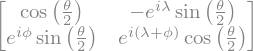

In [30]:
U3 = cos(th/2)*pauli(0) + sin(th/2)*pauli(1)
U3[0,1] = -U3[0,1]*exp(1j*lb)
U3[1,0] = U3[1,0]*exp(1j*ph)
U3[1,1] = U3[1,1]*exp(1j*(ph+lb))
mysim(U3)

## $R_Y(\theta) = U3(\theta, 0, 0)$

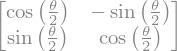

In [40]:
R_Y = U3.subs(ph, 0).subs(lb, 0)
R_Y

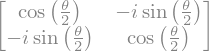

In [41]:
R_X = R_Y
R_X[0,1] = 1j*R_X[0,1]
R_X[1,0] = -1j*R_X[1,0]
mysim(R_X)

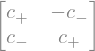

In [30]:
R_Y = R_Y.subs(cos(th/2), cp).subs(sin(th/2), cm)
R_Y

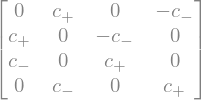

In [31]:
BBOp_AB = tp(pauli(0),pauli(1))*CNOT*tp(R_Y, pauli(0))
BBOp_AB

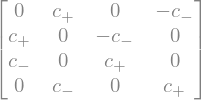

In [32]:
BBOp_AB = tp_porta(2,pauli(1),1)*CNOT*tp(R_Y, pauli(0))
BBOp_AB

In [33]:
for j in range(2):
    for k in range(2):
        print("|{}{}>".format(j,k))
        display(mbk(BBOp_AB*pket(str(j)+str(k))).simplify())

|00>


|01>


|10>


|11>
